In [3]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import linearRegression as lr
rcParams['figure.figsize']=10,8

In [4]:
df = pd.read_excel('AirQualityUCI.xlsx')

In [5]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [6]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [7]:

df.dropna(inplace=True)


In [8]:
df.shape

(9357, 15)

In [10]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [9]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [12]:
df["Date"]=df["Date"].dt.month
df["Date"]

0       3
1       3
2       3
3       3
4       3
       ..
9352    4
9353    4
9354    4
9355    4
9356    4
Name: Date, Length: 9357, dtype: int64

In [ ]:
df['Time']=df['Time'].apply(lambda x: str(x).split(":")[0])

C:\Users\senga\AppData\Local\Temp\ipykernel_43024\51077680.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='viridis')


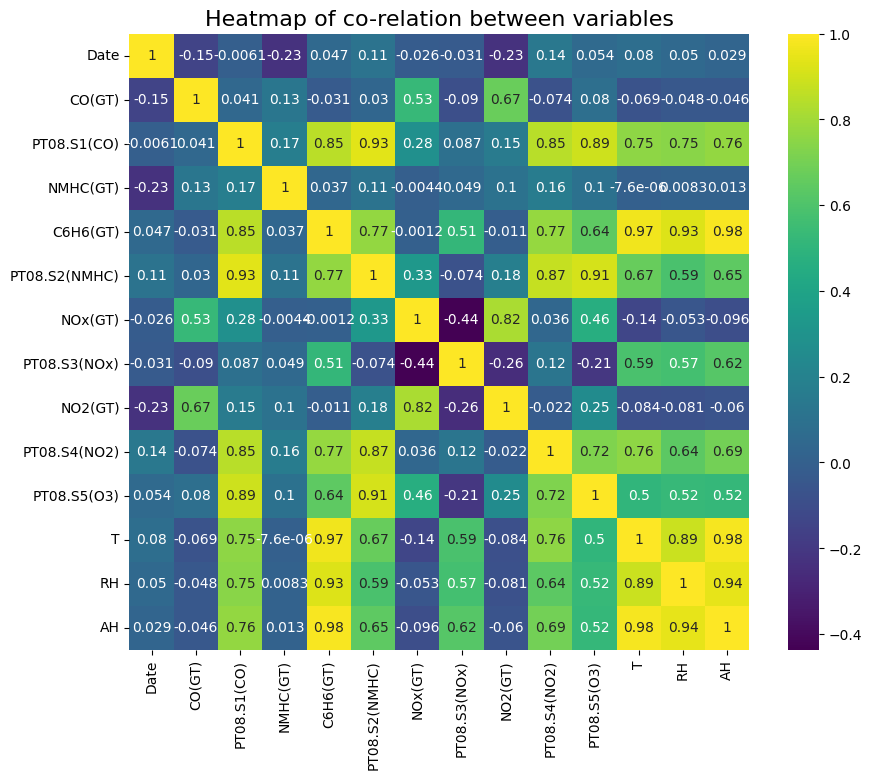

In [15]:
#Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred.
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

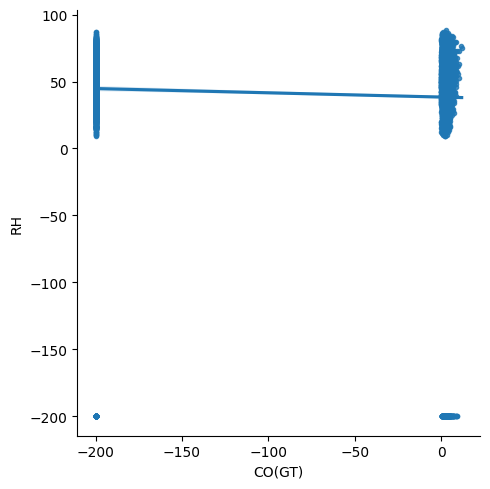

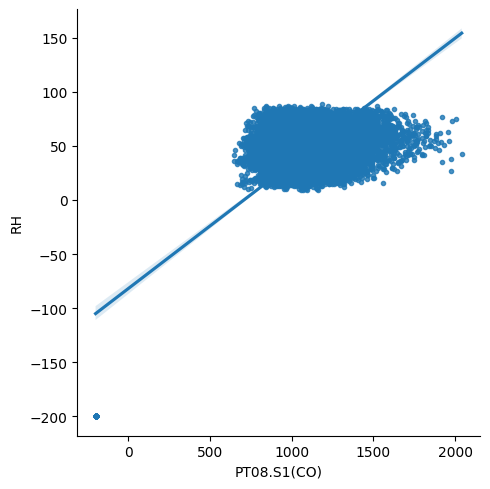

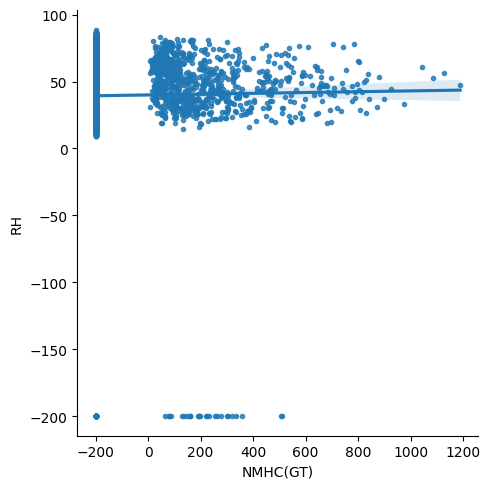

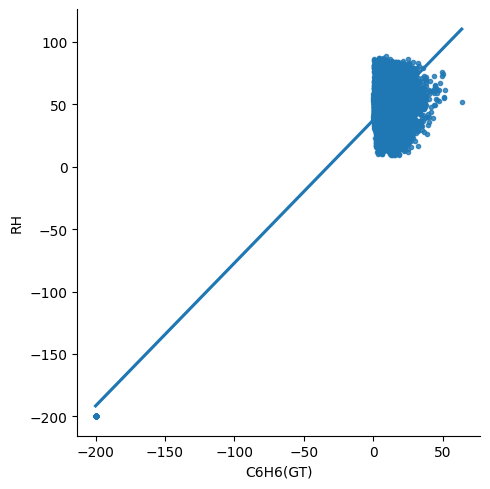

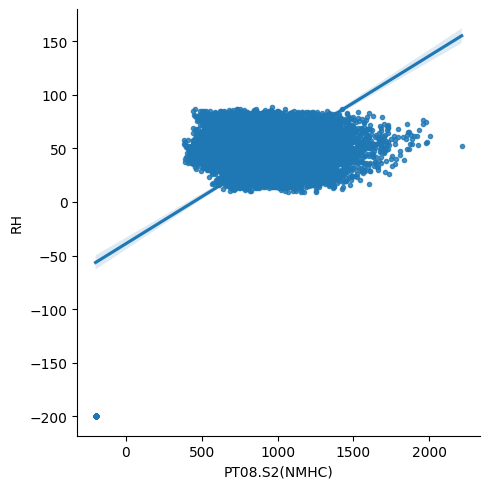

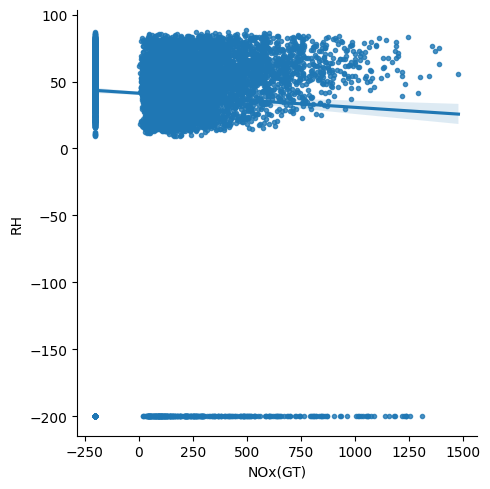

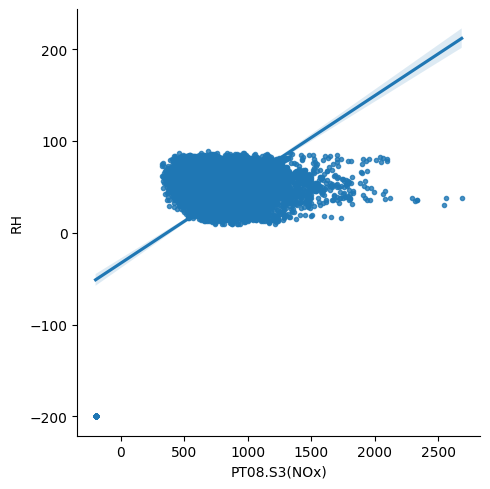

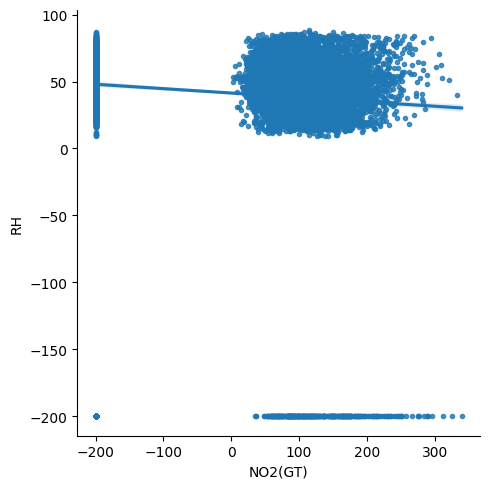

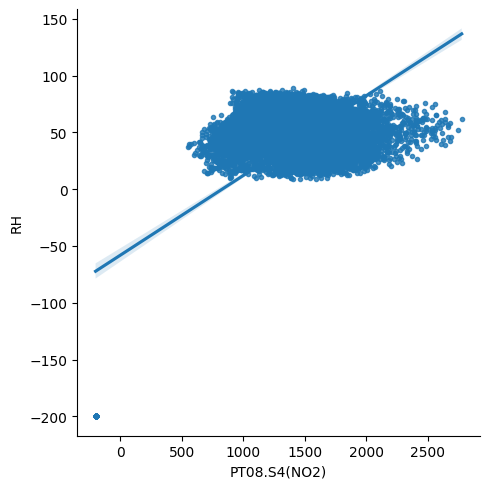

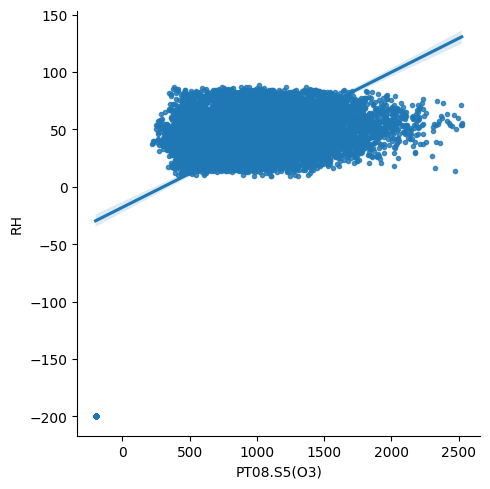

In [26]:
col_=df.columns.tolist()[2:12]
for i in col_:
    sns.lmplot(x=i,y='RH',data=df,markers='.')

In [31]:
#linear Regression
arr=df.to_numpy()
X=arr[:,2:12]
X

array([[2.6, 1360.0, 150, ..., 113.0, 1692.0, 1267.5],
       [2.0, 1292.25, 112, ..., 92.0, 1558.75, 972.25],
       [2.2, 1402.0, 88, ..., 114.0, 1554.5, 1074.0],
       ...,
       [2.4, 1142.0, -200, ..., 174.7, 1240.75, 1092.0],
       [2.1, 1002.5, -200, ..., 155.7, 1041.0, 769.75],
       [2.2, 1070.75, -200, ..., 167.7, 1128.5, 816.0]], dtype=object)

In [32]:
Y=arr[:,13]
Y

array([48.875000953674, 47.699999809265, 53.97500038147, ...,
       18.349999666214, 13.549999952316, 13.125], dtype=object)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [34]:
np.shape(X_train)

(8421, 10)

In [35]:

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
print("After Normalisation:")
print(X_train)

After Normalisation:
[[0.9536643  0.54526175 0.         ... 0.65480823 0.43168067 0.40923698]
 [0.956974   0.58064516 0.         ... 0.58551047 0.43176471 0.51721605]
 [0.95224586 0.52974662 0.         ... 0.50954234 0.47739496 0.41713341]
 ...
 [0.95839243 0.65241656 0.         ... 0.57995183 0.5402521  0.53254981]
 [0.         0.60832682 0.         ... 0.         0.61865546 0.50665687]
 [0.96264775 0.75711575 0.53348382 ... 0.63924402 0.69857143 0.55082178]]


array([2.490967038472533, 2.8212510730319735, 1.761413220667569,
       -0.6634996034306523, 4.428914763988804, 1.297178551880413,
       1.9194845246065084, 1.2629444505148586, 2.3596677241320947,
       3.3504925562738346, 0.9555167316241309], dtype=object)

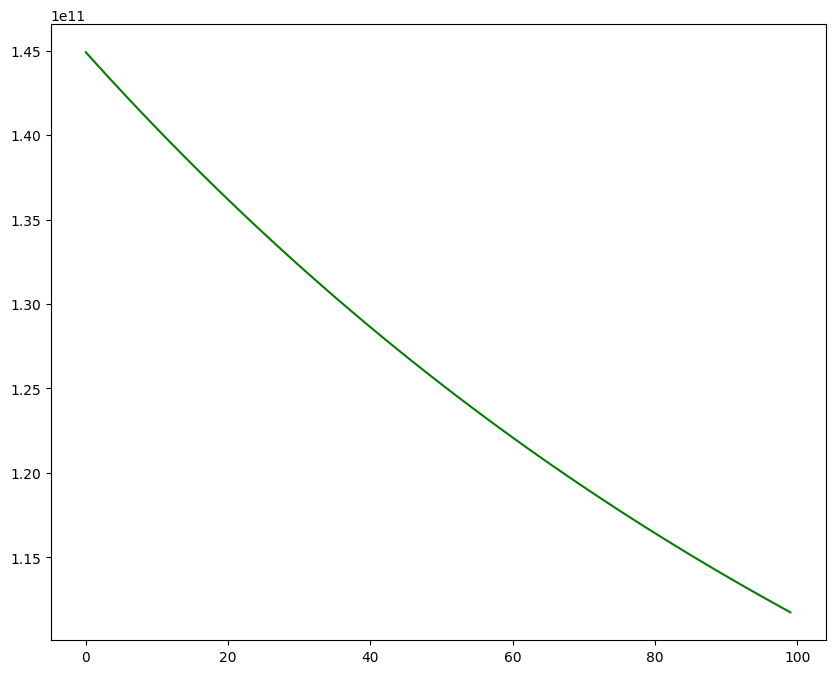

In [36]:
#using Gradient Descent for calculating theta NO REGULISATION 
theta1=lr.fitGD(X_train,Y_train,0.001,1,0,100)
theta1

array([3.5756287471606276, 3.6143035192737853, 2.5031559369677074,
       -0.8713210225564165, 1.6996910209123108, 3.468761816603075,
       0.314405413668828, 0.41029001705833745, 0.9366475920096525,
       4.273289611399724, 1.105824087124821], dtype=object)

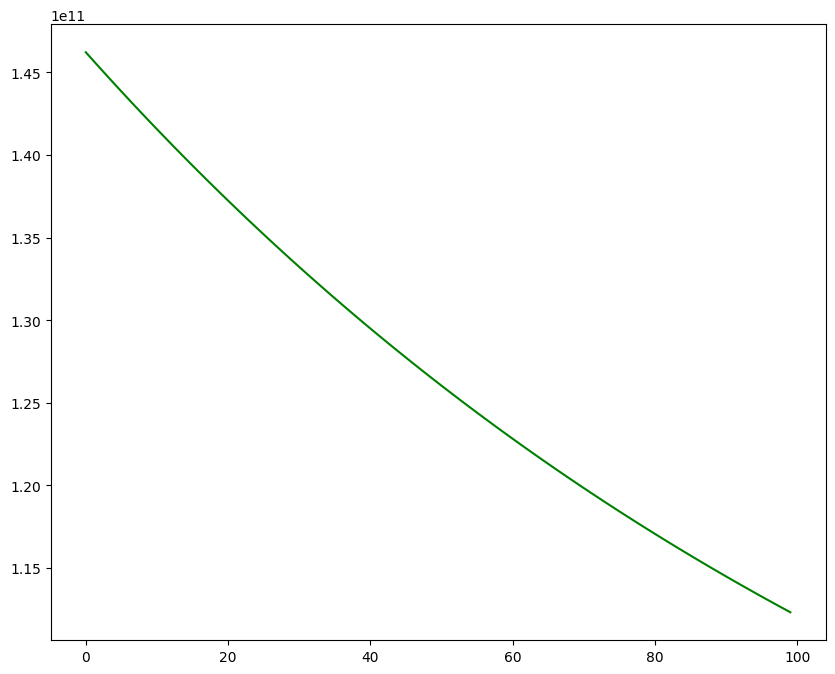

In [34]:
#using Gradient Descent for calculating theta REG REGULISATION 
theta2=lr.fitGD(X_train,Y_train,0.001,1,1,100)
theta2

array([3.1605428940740716, 1.8463372479813356, 2.472980423864571,
       -0.19801937683838974, 6.561150715255835, 1.4544807191344378,
       1.3574123238654539, -0.4779455172357241, 0.18321560636556244,
       1.709178959911963, 0.05071210603940379], dtype=object)

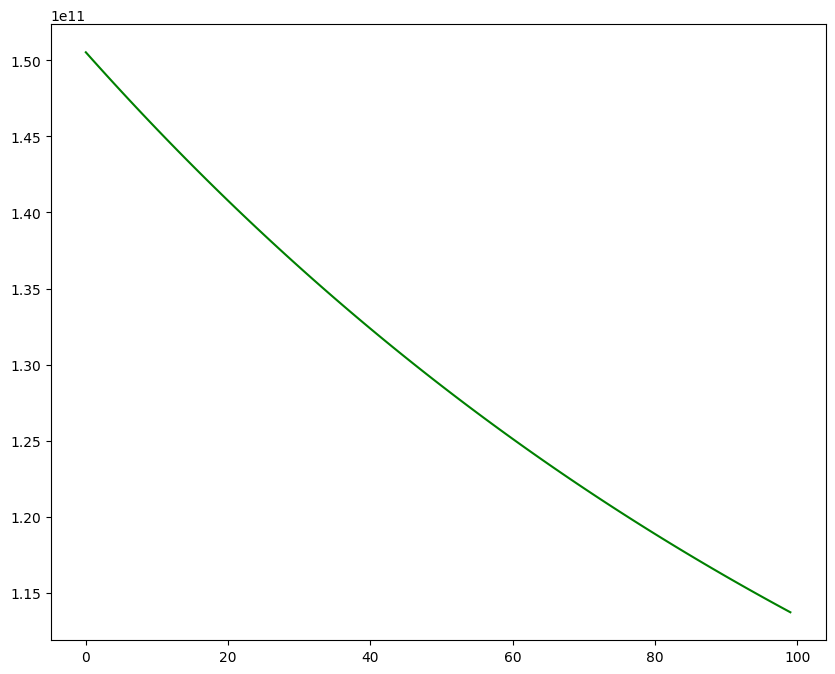

In [35]:
#using Gradient Descent for calculating theta LASSO REGULISATION 
theta3=lr.fitGD(X_train,Y_train,0.001,1,2,100)
theta3

array([2.7152637141400313, 2.7856306021712958, 2.619306184446731,
       -0.905173196047256, 2.7611141560518013, 2.900062197177019,
       0.8227085248527585, 2.201586269102989, 0.7459719714484234,
       3.3299936994551684, 1.6789336464091602], dtype=object)

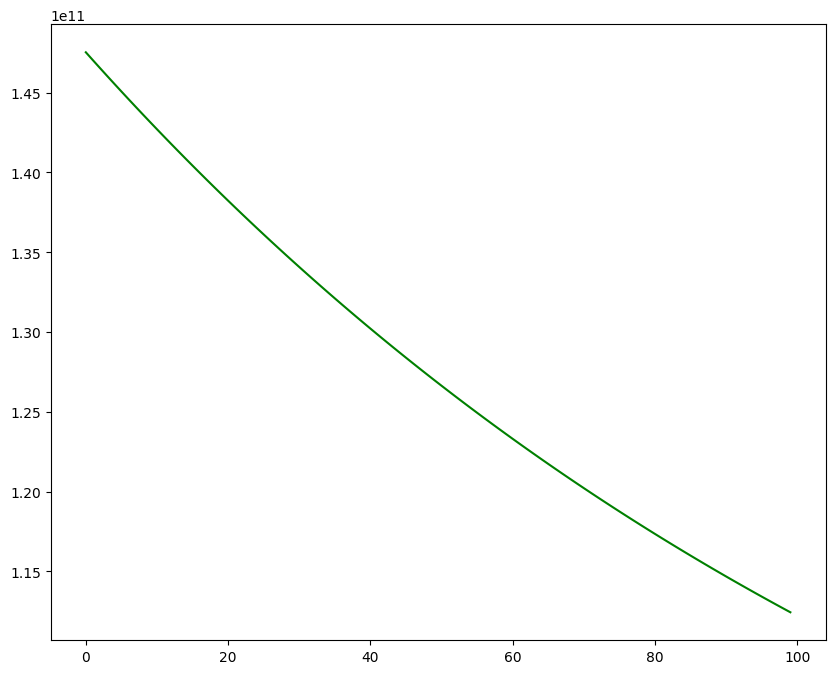

In [36]:
#using Gradient Descent for calculating theta ELASTIC REGULISATION 
theta4=lr.fitGD(X_train,Y_train,0.001,1,3,100)
theta4

In [37]:
np.shape(X_train)

(8421, 10)

In [38]:
print(np.shape(theta1))


(11,)


In [40]:
X_train1= np.concatenate((np.ones((np.shape(X_train)[0], 1)), X_train), axis=1)
Y_pred_train=X_train1@theta1
Y_pred_train


array([14.546087301446912, 14.678292719427914, 14.31391042538931, ...,
       15.3143073367941, 10.841411222375783, 15.87242203845266],
      dtype=object)

In [41]:
print(np.shape(X_train1))

(8421, 11)


In [42]:
#error using theta from GD without regulisation
trainErrorGD=pow(Y_pred_train-Y_train,2)/2*(len(X_train))
trainErrorGD

array([2787253.859639342, 2667835.3959174384, 12753483.669710068, ...,
       6285083.803569535, 4401913.437657699, 840367.2068704378],
      dtype=object)

In [43]:
print(np.shape(X_test))

(936, 10)


In [44]:
X_test1= np.concatenate((np.ones((np.shape(X_test)[0], 1)), X_test), axis=1)

In [45]:
print(np.shape(X_test1))

(936, 11)


In [46]:
Y_predict_test=X_test1@theta1
testErrorGD=pow(Y_predict_test-Y_test,2)/2*(len(X_test))
testErrorGD

array([505065.07321147807, 757947.0760631027, 221766.0748464793,
       1690482.1941158073, 601524.7934015503, 427536.99837910134,
       20013376.7872571, 177774.95805256467, 1003594.9919522754,
       1219864.9235679035, 563556.7916139889, 1458299.67594809,
       1769205.3276773226, 504527.30185101565, 9981.196339509339,
       347249.1171162808, 922918.7059214179, 700993.3315410927,
       536751.5829667997, 635531.7245691182, 753572.4768474688,
       187057.53462544584, 900056.8393561691, 1094723.8482312246,
       3860.277249868191, 19703.023279531848, 214854.86504109736,
       19866.065526629234, 1107572.4007393983, 694596.8739772773,
       2034503.4808493622, 1453849.8570697885, 186360.87148895572,
       753671.6087624775, 521421.1273233424, 705477.3849863658,
       1736696.7422804043, 893404.4443436387, 886158.9351269441,
       244975.5878716604, 163294.37480963927, 121918.65962161079,
       249063.73402814247, 318943.4875077511, 34397.12783902433,
       38321.45810765

In [37]:
#using normal equation method 
thetaN=lr.fitNormal(X_train,Y_train)
thetaN

array([-19.58681061725755, 152.06414542371658, -8.657588072370853,
       107.43504629219582, -194.48072329759742, -7.751588680856376,
       -23.22187386046879, -55.91281713624069, -31.647580203033588,
       92.92459405446772], dtype=object)

In [44]:
print(np.shape(thetaN))
print(np.shape(X_train))

(10,)
(8421, 10)


In [42]:
Y_predict_train=X_train@thetaN
trainErrorN=pow(Y_predict_train-Y_train,2)/2*(len(X_train))
trainErrorN

array([184705.08154544386, 3270133.4519444937, 1819028.7324712006, ...,
       5169900.531739168, 101636.34368113852, 400502.1144649154],
      dtype=object)

In [40]:
#TrainErrorN=lr.costFun(thetaN,X_train,Y_train)
#TrainErrorN

685.8692315060966

In [45]:
print(np.shape(thetaN))
print(np.shape(X_test))

(10,)
(936, 10)


In [46]:
Y_pred_test=X_test@thetaN
testErrorN=pow(Y_pred_test-Y_test,2)/2*(len(X_test))
testErrorN


array([94667.55104856838, 980521.47987466, 138.71180610193184,
       438516.2873677016, 705358.1062299121, 138.16585939861505,
       556620.1973970709, 150337.2418225162, 1479707.0481312142,
       615791.5093254308, 30899.27045850073, 13632.52736081972,
       201145.69276171047, 2129.586803921791, 10755995.588126363,
       192435.92160310363, 18720000.0, 54831.8742445009,
       20140.220097069803, 4828.518674446383, 507579.59720740985,
       25056.817555105044, 78360.95070737349, 58118.51598995835,
       105905.8447468619, 29430.03148538391, 39599.41753552063,
       9402.667782359213, 295486.1003491704, 155009.1393078893,
       148209.05170366095, 8677.923887012032, 1.2431456487138999,
       1266010.5402883575, 48606.92654484599, 494001.61355467985,
       235.75467235191667, 15335.05425149076, 1062.293400550851,
       491774.8959688966, 54297.62019230074, 2600.0757611962763,
       427977.34121598635, 88527.41880122789, 1237890.5703677393,
       135.69306490316004, 148479